# Orbit Homework

Corinne Wilklow


In [70]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

import numpy as np

print('done')

done


### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [71]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [72]:
# And an inition condition (with everything in SI units)

#r_0 = 147e9 * m
G = 6.674e-11 * N / kg**2 * m**2

m1 = 1.989e30 * kg #mass of sun
m2 = 5.972e24 * kg #mass of earth

t_0 = 0 * s
t_end = 60*60*24*7*52 *s

x_0 = 0 * m
y_0 = 147e9 * m
vx_0 = 30330 * m/s
vy_0 = 0 * m/s

init = State(x = x_0, y = y_0 , vx = vx_0, vy = vy_0)

,values
x,0 meter
y,147000000000.0 meter
vx,30330.0 meter / second
vy,0.0 meter / second


In [73]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=G,
                m1=m1,
                r_final=r_sun + r_earth,
                m2=m2,
                t_0=t_0,
                t_end=t_end)

,values
init,x 0 meter y 147000000...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31449600 second


In [74]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    r = Vector(x,y)
    angle = r.angle
    force = G * m1 * m2 / r.mag**2 
    
    fx, fy = pol2cart(angle, force)
    Force = Vector(fx,fy)
    return Force

In [75]:
test = Vector(1,1)
test.mag
test.angle

<Quantity(0.7853981633974483, 'radian')>

In [76]:
universal_gravitation(init, system)

<Quantity([2.24639938e+06 3.66864860e+22], 'newton')>

In [77]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)
    
    v = Vector(vx,vy)

    force = universal_gravitation(state, system)
    
    dxdt = vx
    dydt = vy
    print(v.x)
    
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    print(force.x)
    
    return dxdt, dydt, dvxdt, dvydt

In [78]:
def universal_gravitation_2(state,system):
    
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x,y)
    
    force = (G*m1*m2/r.mag**2)
    direction = -r.hat()
    forcevec = direction * force

    return forcevec

In [79]:
# Always test the slope function!

slope_func(init, 0, system)

30330.0 meter / second
2246399.3824401917 newton


(<Quantity(30330.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-3.761552884193221e-19, 'newton / kilogram')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>)

In [80]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    r = Vector(x,y)
    return r.y - system.r_final

In [81]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [82]:
timestep = linspace(t_0, t_end, 200)

<Quantity([       0.           158038.19095477   316076.38190955   474114.57286432
   632152.7638191    790190.95477387   948229.14572864  1106267.33668342
  1264305.52763819  1422343.71859296  1580381.90954774  1738420.10050251
  1896458.29145729  2054496.48241206  2212534.67336683  2370572.86432161
  2528611.05527638  2686649.24623116  2844687.43718593  3002725.6281407
  3160763.81909548  3318802.01005025  3476840.20100502  3634878.3919598
  3792916.58291457  3950954.77386935  4108992.96482412  4267031.15577889
  4425069.34673367  4583107.53768844  4741145.72864322  4899183.91959799
  5057222.11055276  5215260.30150754  5373298.49246231  5531336.68341709
  5689374.87437186  5847413.06532663  6005451.25628141  6163489.44723618
  6321527.63819095  6479565.82914573  6637604.0201005   6795642.21105528
  6953680.40201005  7111718.59296482  7269756.7839196   7427794.97487437
  7585833.16582915  7743871.35678392  7901909.54773869  8059947.73869347
  8217985.92964824  8376024.12060301  8534062.31155779  8692100.50251256
  8850138.69346734  9008176.88442211  9166215.07537688  9324253.26633166
  9482291.45728643  9640329.64824121  9798367.83919598  9956406.03015075
 10114444.22110553 10272482.4120603  10430520.60301507 10588558.79396985
 10746596.98492462 10904635.1758794  11062673.36683417 11220711.55778894
 11378749.74874372 11536787.93969849 11694826.13065327 11852864.32160804
 12010902.51256281 12168940.70351759 12326978.89447236 12485017.08542714
 12643055.27638191 12801093.46733668 12959131.65829146 13117169.84924623
 13275208.040201   13433246.23115578 13591284.42211055 13749322.61306533
 13907360.8040201  14065398.99497487 14223437.18592965 14381475.37688442
 14539513.5678392  14697551.75879397 14855589.94974874 15013628.14070352
 15171666.33165829 15329704.52261307 15487742.71356784 15645780.90452261
 15803819.09547739 15961857.28643216 16119895.47738693 16277933.66834171
 16435971.85929648 16594010.05025125 16752048.24120603 16910086.4321608
 17068124.62311558 17226162.81407035 17384201.00502513 17542239.1959799
 17700277.38693467 17858315.57788945 18016353.76884422 18174391.959799
 18332430.15075377 18490468.34170854 18648506.53266332 18806544.72361809
 18964582.91457286 19122621.10552764 19280659.29648241 19438697.48743718
 19596735.67839196 19754773.86934673 19912812.06030151 20070850.25125628
 20228888.44221105 20386926.63316583 20544964.8241206  20703003.01507537
 20861041.20603015 21019079.39698492 21177117.5879397  21335155.77889447
 21493193.96984924 21651232.16080402 21809270.35175879 21967308.54271357
 22125346.73366834 22283384.92462311 22441423.11557789 22599461.30653266
 22757499.49748744 22915537.68844221 23073575.87939698 23231614.07035176
 23389652.26130653 23547690.45226131 23705728.64321608 23863766.83417085
 24021805.02512563 24179843.2160804  24337881.40703518 24495919.59798995
 24653957.78894472 24811995.9798995  24970034.17085427 25128072.36180905
 25286110.55276382 25444148.74371859 25602186.93467337 25760225.12562814
 25918263.31658291 26076301.50753769 26234339.69849246 26392377.88944723
 26550416.08040201 26708454.27135678 26866492.46231155 27024530.65326633
 27182568.8442211  27340607.03517588 27498645.22613065 27656683.41708542
 27814721.6080402  27972759.79899497 28130797.98994975 28288836.18090452
 28446874.37185929 28604912.56281407 28762950.75376884 28920988.94472362
 29079027.13567839 29237065.32663316 29395103.51758794 29553141.70854271
 29711179.89949749 29869218.09045226 30027256.28140703 30185294.47236181
 30343332.66331658 30501370.85427136 30659409.04522613 30817447.2361809
 30975485.42713568 31133523.61809045 31291561.80904523 31449600.        ], 'second')>

In [83]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, t_eval = timestep )
details

30330.0 dimensionless
2246399.3824401917 meter ** 2 * newton
30330.0 dimensionless
2246399.3824401917 meter ** 2 * newton
30330.0 dimensionless
67414689.69766268 meter ** 2 * newton
30330.0 dimensionless
108144871.14467673 meter ** 2 * newton
30330.0 dimensionless
279211633.2221358 meter ** 2 * newton
30330.0 dimensionless
311795778.379747 meter ** 2 * newton
30330.0 dimensionless
352525959.82676107 meter ** 2 * newton
30330.0 dimensionless
352525959.82676107 meter ** 2 * newton
30330.0 dimensionless
1061231117.0048056 meter ** 2 * newton
30330.0 dimensionless
1411510677.4491265 meter ** 2 * newton
30330.0 dimensionless
3179200552.2495365 meter ** 2 * newton
30330.0 dimensionless
3488749931.2468433 meter ** 2 * newton
30330.0 dimensionless
3879759673.1381783 meter ** 2 * newton
30330.0 dimensionless
3879759673.1381783 meter ** 2 * newton
30330.0 dimensionless
10942373136.050415 meter ** 2 * newton
30330.0 dimensionless
14469606849.361834 meter ** 2 * newton
30330.0 dimensionless
321139

,values
sol,None
t_events,[]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [84]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31449600.0, 'second')>

In [85]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(363.99999999999994, 'day')>

In [86]:
# Before plotting, we run the simulation again with `t_eval`

'''ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)
details'''

'ts = linspace(t_0, t_final, 201)\nresults, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)\ndetails'

In [87]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [88]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

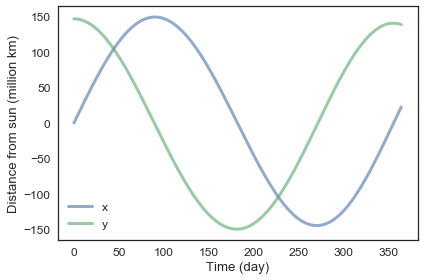

In [89]:
# And plotting

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

Saving figure to file figs/chap10-fig02.pdf


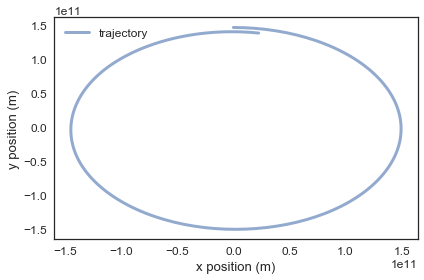

In [90]:
def plot_trajectory(results):
    plot(results.x, results.y, label='trajectory')

    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
savefig('figs/chap10-fig02.pdf')